# What is the best plan?

You work as an analyst for the telecommunications company Megaline. The company offers customers two prepaid plans: Surf and Ultimate. The commercial department wants to know which plan generates more revenue to adjust the advertising budget.

You will conduct a preliminary analysis of the plans based on a small selection of customers. You will have data from 500 Megaline customers: who they are, where they are from, which plan they use, and the number of calls and messages made in 2018. Your task is to analyze customer behavior and determine which prepaid plan generates more revenue.

## Start-up

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from scipy import stats as st
from math import factorial
import math as mt

## Loading Data

In [2]:
# Reading data files
df_users = pd.read_csv("/datasets/megaline_users.csv")
df_calls = pd.read_csv("/datasets/megaline_calls.csv")
df_messages = pd.read_csv("/datasets/megaline_messages.csv")
df_internet = pd.read_csv("/datasets/megaline_internet.csv")
df_plans = pd.read_csv("/datasets/megaline_plans.csv")


## Data Preparation

## Plans

In [3]:
# Checking data on DataFrame "Plans"

df_plans.info()

display(df_plans)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Conclusion: No issues were found with this dataframe—no duplicates, missing values, or data type problems.

## Fix and adjust the data and dataframe

In [4]:
# Changing column order
df_plans = df_plans[["plan_name","usd_monthly_pay","messages_included","mb_per_month_included","minutes_included","usd_per_message","usd_per_gb","usd_per_minute"]]

# Converting mb to gb to align with cost out of plan
df_plans["mb_per_month_included"] = df_plans["mb_per_month_included"] / 1024

# Renaming column from mb para gb
df_plans.columns = ["plan_name","usd_monthly_pay","messages_included","gb_per_month_included","minutes_included","usd_per_message","usd_per_gb","usd_per_minute"]
print(df_plans.head())

  plan_name  usd_monthly_pay  messages_included  gb_per_month_included  \
0      surf               20                 50                   15.0   
1  ultimate               70               1000                   30.0   

   minutes_included  usd_per_message  usd_per_gb  usd_per_minute  
0               500             0.03          10            0.03  
1              3000             0.01           7            0.01  


## Users

In [5]:
# Checking data on DataFrame "Users"
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Printing a sample of user data

df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
366,1366,Rod,Huff,62,"Cincinnati, OH-KY-IN MSA",2018-07-30,surf,NaN
207,1207,Samuel,Porter,63,"Omaha-Council Bluffs, NE-IA MSA",2018-12-22,surf,NaN
451,1451,Lenard,Harding,53,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-02-15,ultimate,2018-12-10
201,1201,Jeanelle,Estrada,61,"Bridgeport-Stamford-Norwalk, CT MSA",2018-06-04,surf,NaN
369,1369,Bernard,Mckee,69,"Milwaukee-Waukesha, WI MSA",2018-10-06,surf,NaN
289,1289,Steve,Blair,47,"Detroit-Warren-Dearborn, MI MSA",2018-11-12,ultimate,NaN
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaN
402,1402,Jesus,Berry,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-11,surf,2018-12-26
176,1176,Terrance,Shaffer,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-03,surf,NaN
472,1472,Maximo,Mendoza,51,"San Francisco-Oakland-Berkeley, CA MSA",2018-04-10,surf,NaN


Conclusion: The column churn_date has missing values (NaN), which indicate that churn did not occur. The values in the reg_date column were recognized as object when they should be of type date.

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [7]:
#changing NaN for "not churned"
df_users["churn_date"] = df_users["churn_date"].fillna("not churned")

In [8]:
#changing reg_date to type 'datetime64'
df_users["reg_date"] = pd.to_datetime(df_users["reg_date"],format="%Y-%m-%d")
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


## Calls

In [9]:
# Checking data on DataFrame "Calls"
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Printing a sample of call data
df_calls.sample(10)

,id,user_id,call_date,duration
74597,1263_581,1263,2018-11-26,9.63
82059,1295_584,1295,2018-08-25,0.44
46496,1168_462,1168,2018-12-15,0.04
115376,1404_170,1404,2018-10-15,1.78
128481,1461_95,1461,2018-09-18,27.03
58824,1212_373,1212,2018-12-25,2.85
73096,1259_114,1259,2018-10-15,3.32
117526,1411_126,1411,2018-10-16,2.11
78273,1280_305,1280,2018-07-27,4.12
24403,1092_297,1092,2018-12-20,21.04


Conclusion:
- No missing data was identified.

- The values in the call_date column were recognized as object when they should be of type date.

- We need to round the call durations up.

In [11]:
# Rounding call duration up
df_calls["duration_rounded"] = np.ceil(df_calls["duration"])
df_calls.sample(10)

,id,user_id,call_date,duration,duration_rounded
21754,1079_467,1079,2018-10-04,9.81,10.0
76494,1272_39,1272,2018-12-20,0.00,0.0
1724,1009_146,1009,2018-09-03,0.81,1.0
517,1003_127,1003,2018-12-26,0.00,0.0
29737,1112_386,1112,2018-12-13,4.71,5.0
61372,1222_19,1222,2018-10-20,8.10,9.0
29580,1112_112,1112,2018-11-24,0.00,0.0
65365,1236_670,1236,2018-07-23,5.32,6.0
107466,1381_203,1381,2018-10-24,7.16,8.0
32316,1122_154,1122,2018-09-29,14.53,15.0


In [12]:
#changing call_date to type 'datetime64'
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"],format="%Y-%m-%d")
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                137735 non-null  object        
 1   user_id           137735 non-null  int64         
 2   call_date         137735 non-null  datetime64[ns]
 3   duration          137735 non-null  float64       
 4   duration_rounded  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 5.3+ MB


## Messages

In [13]:
# Checking data on DataFrame "Calls"
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Printing a sample of message data
df_messages.sample(10)

,id,user_id,message_date
6651,1056_161,1056,2018-08-15
23720,1144_190,1144,2018-08-29
39808,1258_173,1258,2018-11-28
45217,1303_136,1303,2018-12-16
21577,1132_989,1132,2018-07-17
61356,1384_467,1384,2018-11-29
10798,1077_69,1077,2018-06-22
28866,1176_7,1176,2018-11-28
57766,1364_30,1364,2018-11-07
55822,1352_172,1352,2018-12-06


Conclusion:
- No missing data was identified.

- The values in the message_date column were recognized as object when they should be of type date.. 

In [15]:
#changing message_date to type 'datetime64'
df_messages["message_date"] = pd.to_datetime(df_messages["message_date"],format="%Y-%m-%d")

## Internet

In [16]:
# Checking data on DataFrame "Calls"
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [17]:
# Printing a sample of internet data
df_internet.sample(10)

,id,user_id,session_date,mb_used
16665,1076_11,1076,2018-09-19,366.86
9194,1047_32,1047,2018-12-03,717.95
101203,1482_47,1482,2018-11-21,375.35
74959,1353_122,1353,2018-09-23,590.45
16769,1076_245,1076,2018-10-10,150.11
71084,1332_57,1332,2018-12-16,376.52
37613,1170_563,1170,2018-11-21,499.91
1525,1009_60,1009,2018-08-01,428.02
29488,1134_340,1134,2018-10-01,501.12
87295,1404_162,1404,2018-09-25,374.20


Conclusion:
- No missing data was identified.

- The values in the session_date column were recognized as object when they should be of type date.

- We need to round up the MB consumed, but only for the monthly billing, not for each session.

In [18]:
#changing session_date to type 'datetime64'
df_internet["session_date"] = pd.to_datetime(df_internet["session_date"],format="%Y-%m-%d")

## Checking plan conditions

In [19]:
# Printing plan conditions and making sure the are understood
display(df_plans)

,plan_name,usd_monthly_pay,messages_included,gb_per_month_included,minutes_included,usd_per_message,usd_per_gb,usd_per_minute
0,surf,20,50,15.0,500,0.03,10,0.03
1,ultimate,70,1000,30.0,3000,0.01,7,0.01


## Agregating data per user

In [20]:
# Calculating number of calls made per user per month
df_calls["month_call_date"] = df_calls["call_date"].dt.month
calls_per_usermonth = df_calls.groupby(["user_id","month_call_date"])["id"].count()
calls_per_usermonth = calls_per_usermonth.rename_axis(["user_id","month"])
print(calls_per_usermonth)

user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: id, Length: 2258, dtype: int64


In [21]:
# Calculating # of minutes spent per user per month
minutes_per_usermonth = df_calls.groupby(["user_id","month_call_date"])["duration_rounded"].sum()
minutes_per_usermonth = minutes_per_usermonth.rename_axis(["user_id","month"])
print(minutes_per_usermonth)

user_id  month
1000     12       124.0
1001     8        182.0
         9        315.0
         10       393.0
         11       426.0
                  ...  
1498     12       339.0
1499     9        346.0
         10       385.0
         11       308.0
         12       496.0
Name: duration_rounded, Length: 2258, dtype: float64


In [22]:
# Calculating # of messages sent per user per month
df_messages["month_msg_date"] = df_messages["message_date"].dt.month
messages_per_usermonth = df_messages.groupby(["user_id","month_msg_date"])["id"].count()
messages_per_usermonth = messages_per_usermonth.rename_axis(["user_id","month"])
print(messages_per_usermonth)

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: id, Length: 1806, dtype: int64


In [23]:
# Calculating internet traffic per user per month
df_internet["month_session_date"] = df_internet["session_date"].dt.month
internet_per_usermonth = df_internet.groupby(["user_id","month_session_date"])["mb_used"].sum()
internet_per_usermonth = internet_per_usermonth.rename_axis(["user_id","month"])
print(internet_per_usermonth)

user_id  month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
                    ...   
1498     12       23137.69
1499     9        12984.76
         10       19492.43
         11       16813.83
         12       22059.21
Name: mb_used, Length: 2277, dtype: float64


[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]

In [24]:
# Consolidating calls, minutes, messages and internet based on user_id e month
usermonth = pd.concat([calls_per_usermonth,minutes_per_usermonth,messages_per_usermonth,internet_per_usermonth],axis="columns")
usermonth.columns = ["calls_made","call_duration","msg_sent","mb_consumed"]
print(usermonth.head(10))
print(usermonth.tail(10))
usermonth.reset_index(inplace=True)
usermonth.sample(10)

               calls_made  call_duration  msg_sent  mb_consumed
user_id month                                                  
1000    12           16.0          124.0      11.0      1901.47
1001    8            27.0          182.0      30.0      6919.15
        9            49.0          315.0      44.0     13314.82
        10           65.0          393.0      53.0     22330.49
        11           64.0          426.0      36.0     18504.30
        12           56.0          412.0      44.0     19369.18
1002    10           11.0           59.0      15.0      6552.01
        11           55.0          386.0      32.0     19345.08
        12           47.0          384.0      41.0     14396.24
1003    12          149.0         1104.0      50.0     27044.14
               calls_made  call_duration  msg_sent  mb_consumed
user_id month                                                  
1498    7            43.0          321.0       NaN     24834.37
        8            44.0          266.0

,user_id,month,calls_made,call_duration,msg_sent,mb_consumed
1106,1235,11,51.0,336.0,33.0,13245.86
46,1011,6,19.0,118.0,21.0,6685.11
1017,1213,11,10.0,42.0,11.0,1938.76
133,1036,12,50.0,368.0,45.0,8787.79
1506,1328,6,122.0,860.0,132.0,23829.72
2209,1481,12,6.0,36.0,3.0,1265.78
2200,1477,12,49.0,289.0,2.0,27961.49
652,1138,5,61.0,381.0,16.0,23059.99
1827,1393,10,9.0,71.0,4.0,NaN
905,1188,10,48.0,344.0,43.0,20608.20


In [25]:
# Adding plan information
usermonth_planinfo = usermonth.merge(df_users, on="user_id")[["user_id","month","calls_made","call_duration","msg_sent","mb_consumed","plan"]]
display(usermonth_planinfo)

,user_id,month,calls_made,call_duration,msg_sent,mb_consumed,plan
0,1000,12,16.0,124.0,11.0,1901.47,ultimate
1,1001,8,27.0,182.0,30.0,6919.15,surf
2,1001,9,49.0,315.0,44.0,13314.82,surf
3,1001,10,65.0,393.0,53.0,22330.49,surf
4,1001,11,64.0,426.0,36.0,18504.30,surf
...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,NaN,23137.69,surf
2289,1499,9,41.0,346.0,NaN,12984.76,surf
2290,1499,10,53.0,385.0,NaN,19492.43,surf
2291,1499,11,45.0,308.0,NaN,16813.83,surf


In [26]:
# Calculating monthly revenue per user
# Including plan details
usermonth_planinfo_details = usermonth_planinfo.merge(df_plans,left_on="plan", right_on="plan_name")[["user_id","month","calls_made","call_duration","msg_sent","mb_consumed", "plan","usd_monthly_pay","messages_included","gb_per_month_included","minutes_included","usd_per_message","usd_per_gb","usd_per_minute"]]

# Converting mb to gb and rounding up
usermonth_planinfo_details["mb_consumed"] = np.ceil(usermonth_planinfo_details["mb_consumed"] / 1024)

# renaming column from mb_consumed to gb_consumed
usermonth_planinfo_details.columns = ["user_id","month","calls_made","call_duration","msg_sent","gb_consumed", "plan","usd_monthly_pay","messages_included","gb_per_month_included","minutes_included","usd_per_message","usd_per_gb","usd_per_minute"]


In [27]:
# Identifying excess minutes
usermonth_planinfo_details["minutes_excess"] = usermonth_planinfo_details["call_duration"] > usermonth_planinfo_details["minutes_included"]
usermonth_planinfo_details["minutes_excess_qty"] = np.where(usermonth_planinfo_details["minutes_excess"],
    usermonth_planinfo_details["call_duration"] - usermonth_planinfo_details["minutes_included"],
    0
)
# Identifying excess messages
usermonth_planinfo_details["msg_excess"] = usermonth_planinfo_details["msg_sent"] > usermonth_planinfo_details["messages_included"]
usermonth_planinfo_details["msg_excess_qty"] = np.where(usermonth_planinfo_details["msg_excess"],
    usermonth_planinfo_details["msg_sent"] - usermonth_planinfo_details["messages_included"],
    0
)

# Identifying excess internet traffic
usermonth_planinfo_details["internet_excess"] = usermonth_planinfo_details["gb_consumed"] > usermonth_planinfo_details["gb_per_month_included"]
usermonth_planinfo_details["internet_excess_qty"] = np.where(usermonth_planinfo_details["internet_excess"],
    usermonth_planinfo_details["gb_consumed"] - usermonth_planinfo_details["gb_per_month_included"],
    0
)

usermonth_planinfo_details.sample(15)

,user_id,month,calls_made,call_duration,msg_sent,gb_consumed,plan,usd_monthly_pay,messages_included,gb_per_month_included,minutes_included,usd_per_message,usd_per_gb,usd_per_minute,minutes_excess,minutes_excess_qty,msg_excess,msg_excess_qty,internet_excess,internet_excess_qty
927,1071,12,67.0,467.0,NaN,21.0,surf,20,50,15.0,500,0.03,10,0.03,False,0.0,False,0.0,True,6.0
1812,1334,9,132.0,836.0,15.0,15.0,surf,20,50,15.0,500,0.03,10,0.03,True,336.0,False,0.0,False,0.0
83,1050,8,51.0,358.0,NaN,15.0,ultimate,70,1000,30.0,3000,0.01,7,0.01,False,0.0,False,0.0,False,0.0
1184,1141,7,112.0,786.0,13.0,15.0,surf,20,50,15.0,500,0.03,10,0.03,True,286.0,False,0.0,False,0.0
1445,1220,10,91.0,634.0,35.0,20.0,surf,20,50,15.0,500,0.03,10,0.03,True,134.0,False,0.0,True,5.0
1065,1106,12,67.0,569.0,NaN,22.0,surf,20,50,15.0,500,0.03,10,0.03,True,69.0,False,0.0,True,7.0
140,1085,8,4.0,12.0,NaN,2.0,ultimate,70,1000,30.0,3000,0.01,7,0.01,False,0.0,False,0.0,False,0.0
348,1236,5,58.0,369.0,35.0,15.0,ultimate,70,1000,30.0,3000,0.01,7,0.01,False,0.0,False,0.0,False,0.0
2106,1419,12,117.0,835.0,144.0,19.0,surf,20,50,15.0,500,0.03,10,0.03,True,335.0,True,94.0,True,4.0
229,1155,10,31.0,271.0,23.0,26.0,ultimate,70,1000,30.0,3000,0.01,7,0.01,False,0.0,False,0.0,False,0.0


In [28]:
# Calculating revenue
usermonth_planinfo_details["revenue"] = usermonth_planinfo_details["usd_monthly_pay"] + usermonth_planinfo_details["minutes_excess_qty"] * usermonth_planinfo_details["usd_per_minute"] + usermonth_planinfo_details["msg_excess_qty"] * usermonth_planinfo_details["usd_per_message"] + usermonth_planinfo_details["internet_excess_qty"] * usermonth_planinfo_details["usd_per_gb"]
usermonth_planinfo_details.sample(15)

,user_id,month,calls_made,call_duration,msg_sent,gb_consumed,plan,usd_monthly_pay,messages_included,gb_per_month_included,...,usd_per_message,usd_per_gb,usd_per_minute,minutes_excess,minutes_excess_qty,msg_excess,msg_excess_qty,internet_excess,internet_excess_qty,revenue
24,1028,10,6.0,39.0,73.0,46.0,ultimate,70,1000,30.0,...,0.01,7,0.01,False,0.0,False,0.0,True,16.0,182.00
2093,1415,9,74.0,415.0,NaN,21.0,surf,20,50,15.0,...,0.03,10,0.03,False,0.0,False,0.0,True,6.0,80.00
755,1010,7,101.0,698.0,NaN,13.0,surf,20,50,15.0,...,0.03,10,0.03,True,198.0,False,0.0,False,0.0,25.94
1144,1130,11,80.0,586.0,89.0,14.0,surf,20,50,15.0,...,0.03,10,0.03,True,86.0,True,39.0,False,0.0,23.75
718,1493,12,65.0,473.0,NaN,15.0,ultimate,70,1000,30.0,...,0.01,7,0.01,False,0.0,False,0.0,False,0.0,70.00
2008,1392,12,40.0,323.0,62.0,17.0,surf,20,50,15.0,...,0.03,10,0.03,False,0.0,True,12.0,True,2.0,40.36
2247,1489,10,66.0,518.0,84.0,15.0,surf,20,50,15.0,...,0.03,10,0.03,True,18.0,True,34.0,False,0.0,21.56
1390,1203,3,6.0,40.0,3.0,2.0,surf,20,50,15.0,...,0.03,10,0.03,False,0.0,False,0.0,False,0.0,20.00
477,1368,5,38.0,291.0,NaN,8.0,ultimate,70,1000,30.0,...,0.01,7,0.01,False,0.0,False,0.0,False,0.0,70.00
2076,1408,12,66.0,486.0,32.0,15.0,surf,20,50,15.0,...,0.03,10,0.03,False,0.0,False,0.0,False,0.0,20.00


## Understanding Customer Behaviour

### Calls

<AxesSubplot:title={'center':'Duração Média das chamadas por mês e por plano'}, xlabel='month', ylabel='Duração em minutos'>

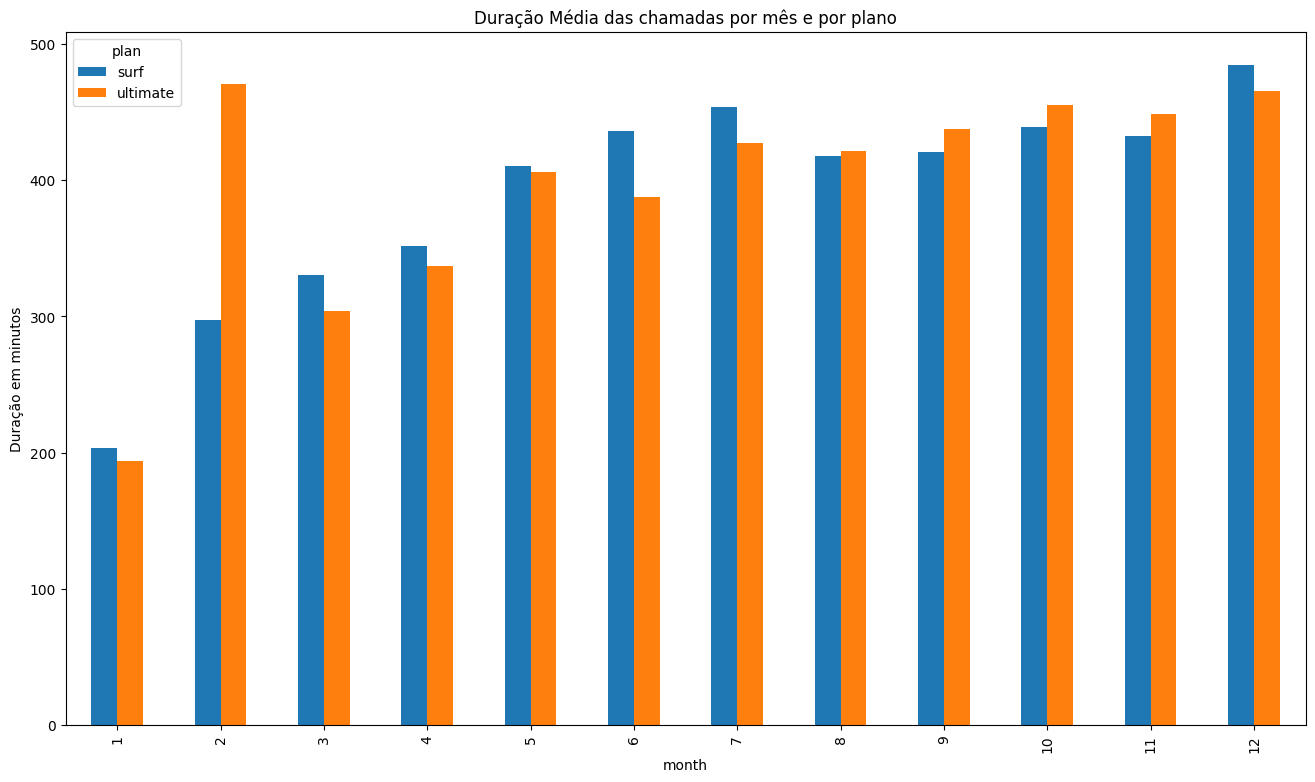

In [29]:
# Comparing average dcall duration for each plan per month and plotting a bar chart to visualize
avg_calls_month_plan = usermonth_planinfo_details.pivot_table(
    index="month",
    columns="plan",
    values="call_duration",
    aggfunc="mean")

avg_calls_month_plan.plot(
    kind="bar",
    title="Average call duration per month and plan",
    ylabel="Duration in minutes",
    figsize=[16,9]
)

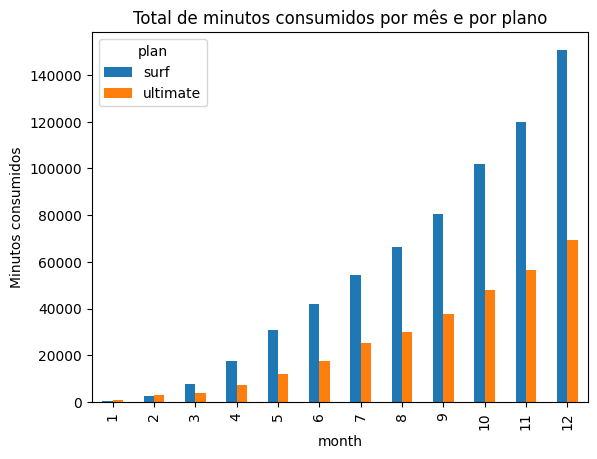

In [30]:
# Comparing minutes consumed by user per plan and plotting a histogram
sum_minutes_month_plan = usermonth_planinfo_details.pivot_table(
    index="month",
    columns="plan",
    values="call_duration",
    aggfunc="sum"
)
sum_minutes_hist = sum_minutes_month_plan.plot(
    kind="bar",
    title="Total de minutos consumidos por mês e por plano",
    ylabel="Minutos consumidos"
)

In [31]:
# Calculating average and variance of monthly call duration
avg_minutes_month_plan = usermonth_planinfo_details.groupby("plan")["call_duration"].mean()
print(avg_minutes_month_plan)

median_minutes_month_plan = usermonth_planinfo_details.groupby("plan")["call_duration"].median()
print(median_minutes_month_plan)

var_minutes_month_plan = usermonth_planinfo_details.groupby("plan")["call_duration"].var()
print(var_minutes_month_plan)

std_minutes_month_plan = np.sqrt(var_minutes_month_plan)
print(std_minutes_month_plan)

plan
surf        436.519741
ultimate    434.676017
Name: call_duration, dtype: float64
plan
surf        430.0
ultimate    425.0
Name: call_duration, dtype: float64
plan
surf        52571.063243
ultimate    56573.632247
Name: call_duration, dtype: float64
plan
surf        229.283805
ultimate    237.852123
Name: call_duration, dtype: float64


<AxesSubplot:xlabel='plan', ylabel='call_duration'>

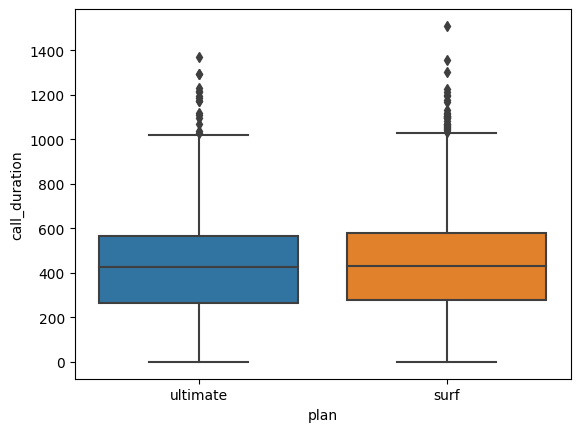

In [32]:
# Creating a boxplot diagram tovisualiza monthly call duration distribution
import seaborn as sns
sns.boxplot(x=usermonth_planinfo_details["plan"], y=usermonth_planinfo_details["call_duration"])

Conclusions:
- The average call duration is similar between the two plans, with a mean of 436 minutes for Surf and 434 minutes for Ultimate. However, the variance for Surf is slightly lower.

- The mean is greater than the median in both plans, indicating a right skew.

- There are several outliers in both the Surf and Ultimate plans, with consumption exceeding 1,000 minutes per month.

- From a call duration perspective, the Surf plan, with its 500 minutes per month, would cover more than 50% of the users.

- More minutes are consumed on the Surf plan than on the Ultimate plan in nearly every month of the year.

- We observed that minute consumption increases throughout the year, reaching its peak in December. This trend is seen in both plans

### Messages

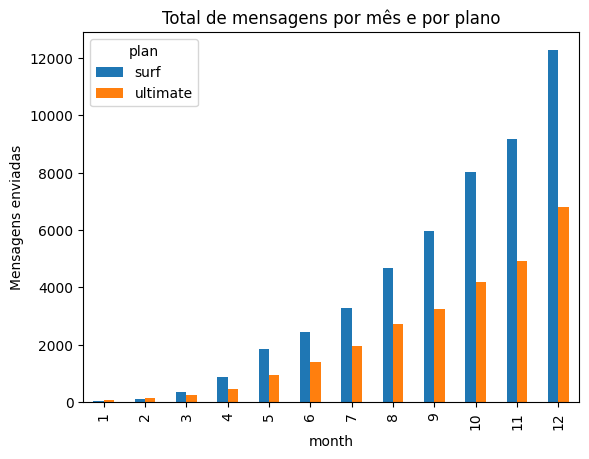

In [33]:
# Comparing # of monthly messages sent by users of each plan
sum_message_month_plan = usermonth_planinfo_details.pivot_table(
    index="month",
    columns="plan",
    values="msg_sent",
    aggfunc="sum"
)
sum_message_hist = sum_message_month_plan.plot(
    kind="bar",
    title="Messages per month and plan",
    ylabel="Messages Sent"
)

In [34]:
# Calculating average and variance of messages sent
avg_message_month_plan = usermonth_planinfo_details.groupby("plan")["msg_sent"].mean()
print(avg_message_month_plan)

median_message_month_plan = usermonth_planinfo_details.groupby("plan")["msg_sent"].median()
print(median_message_month_plan)

var_message_month_plan = usermonth_planinfo_details.groupby("plan")["msg_sent"].var()
print(var_message_month_plan)

std_message_month_plan = np.sqrt(var_message_month_plan)
print(std_message_month_plan)

plan
surf        40.109656
ultimate    46.296233
Name: msg_sent, dtype: float64
plan
surf        32.0
ultimate    41.0
Name: msg_sent, dtype: float64
plan
surf        1091.344231
ultimate    1085.183108
Name: msg_sent, dtype: float64
plan
surf        33.035500
ultimate    32.942118
Name: msg_sent, dtype: float64


<AxesSubplot:xlabel='plan', ylabel='msg_sent'>

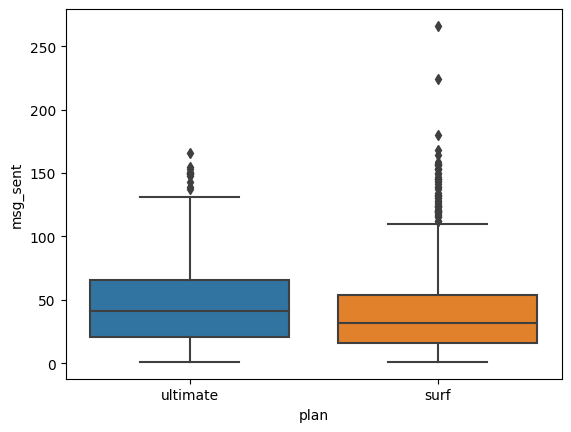

In [35]:
# Plotting in a boxplot to visualize
sns.boxplot(x=usermonth_planinfo_details["plan"], y=usermonth_planinfo_details["msg_sent"])

Conclusions:

- The plans have similar averages (40 for Surf and 44 for Ultimate) with close standard deviations (33 and 32, respectively). The median for Ultimate is slightly higher than that for Surf.

- The mean is greater than the median in both plans, indicating a right skew.

- The Surf plan has more outliers, suggesting that some users send many messages beyond the package limit.

- More messages are sent on the Surf plan than on the Ultimate plan in nearly every month of the year.

- We observed that the number of messages sent increases throughout the year, reaching its peak in December. This trend is seen in both plans.

### Internet

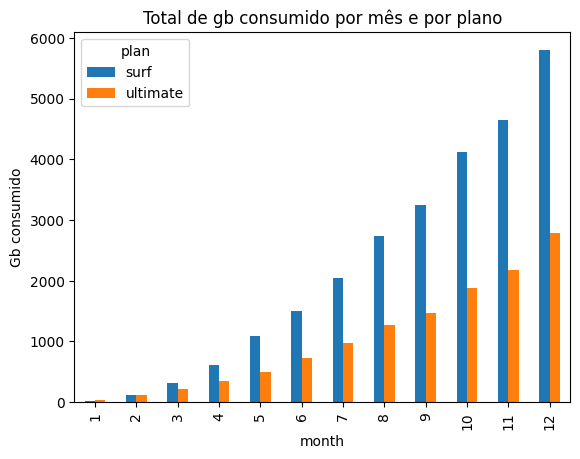

In [36]:
# Comparing internet traffic used by users per plan
sum_internet_month_plan = usermonth_planinfo_details.pivot_table(
    index="month",
    columns="plan",
    values="gb_consumed",
    aggfunc="sum"
)
sum_internet_hist = sum_internet_month_plan.plot(
    kind="bar",
    title="Total gb consumed per month and plan",
    ylabel="Consumed Gb"
)

In [37]:
# Calculating the average and variance of consumed gbs
avg_internet_month_plan = usermonth_planinfo_details.groupby("plan")["gb_consumed"].mean()
print(avg_internet_month_plan)

median_internet_month_plan = usermonth_planinfo_details.groupby("plan")["gb_consumed"].median()
print(median_internet_month_plan)

var_internet_month_plan = usermonth_planinfo_details.groupby("plan")["gb_consumed"].var()
print(var_internet_month_plan)

std_internet_month_plan = np.sqrt(var_internet_month_plan)
print(std_internet_month_plan)

plan
surf        16.831194
ultimate    17.331015
Name: gb_consumed, dtype: float64
plan
surf        17.0
ultimate    17.0
Name: gb_consumed, dtype: float64
plan
surf        59.473734
ultimate    58.494733
Name: gb_consumed, dtype: float64
plan
surf        7.711922
ultimate    7.648185
Name: gb_consumed, dtype: float64


<AxesSubplot:xlabel='plan', ylabel='gb_consumed'>

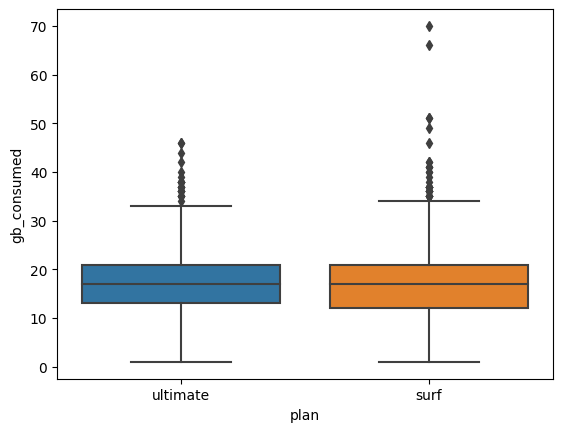

In [38]:
# Plotting in a boxplot to visualize
sns.boxplot(x=usermonth_planinfo_details["plan"], y=usermonth_planinfo_details["gb_consumed"])

Conclusions:

- The averages of the two plans are very close in terms of internet consumption and are similar to the median, indicating a symmetric distribution. The standard deviation is 8 for both plans.

- There are more outliers in the Surf plan than in the Ultimate plan.

- More GBs are consumed in the Surf plan than in the Ultimate plan in nearly every month of the year.

- We observed that GB consumption increases throughout the year, reaching its peak in December. This trend is seen in both plans.

## Revenue

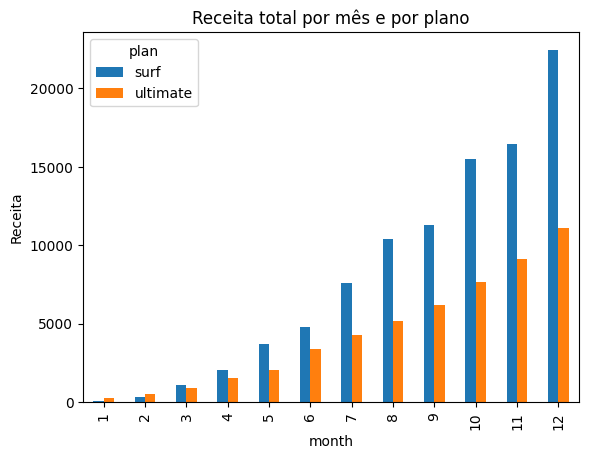

In [39]:
# Comparing revenue per month and plan
sum_revenue_month_plan = usermonth_planinfo_details.pivot_table(
    index="month",
    columns="plan",
    values="revenue",
    aggfunc="sum"
)
sum_revenue_hist = sum_revenue_month_plan.plot(
    kind="bar",
    title="Total REvenue per month and plan",
    ylabel="Revenue"
)

In [40]:
# Calculating average and variance for revenue
avg_revenue_month_plan = usermonth_planinfo_details.groupby("plan")["revenue"].mean()
print(avg_revenue_month_plan)

median_revenue_month_plan = usermonth_planinfo_details.groupby("plan")["revenue"].median()
print(median_revenue_month_plan)

var_revenue_month_plan = usermonth_planinfo_details.groupby("plan")["revenue"].var()
print(var_revenue_month_plan)

std_revenue_month_plan = np.sqrt(var_revenue_month_plan)
print(std_revenue_month_plan)

plan
surf        60.706408
ultimate    72.313889
Name: revenue, dtype: float64
plan
surf        40.36
ultimate    70.00
Name: revenue, dtype: float64
plan
surf        3067.835152
ultimate     129.848486
Name: revenue, dtype: float64
plan
surf        55.388042
ultimate    11.395108
Name: revenue, dtype: float64


<AxesSubplot:xlabel='plan', ylabel='revenue'>

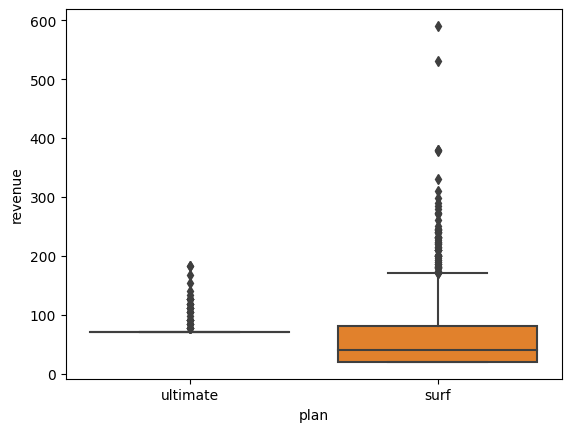

In [41]:
# Plotting in a boxplot to visualize
sns.boxplot(x=usermonth_planinfo_details["plan"], y=usermonth_planinfo_details["revenue"])

Conclusions:

- We observed that the Ultimate plan is nearly symmetric in terms of revenue, as the mean and median are very close (72 and 70, respectively). 
  
- The Surf plan, however, is highly right-skewed, with a mean significantly higher than the median (60 and 40, respectively).

- Both plans have right-side outliers, but the Surf plan has more outliers than the Ultimate plan.

- The standard deviation of the Surf plan is quite high (55), nearly equal to its mean (60). Such dispersion could indicate a non-normal distribution, though additional tests are required to confirm this hypothesis. On the other hand, the Ultimate plan has a much smaller standard deviation (11).



## Hipothesys Testing

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [42]:
# Testing the hypothesys that average revenue of the plans is different

# H0 = Plan revenue is not different
# H1 = Plan revenue is different

sample1 = usermonth_planinfo_details[usermonth_planinfo_details["plan"] == "surf"]["revenue"]
sample2 = usermonth_planinfo_details[usermonth_planinfo_details["plan"] == "ultimate"]["revenue"]
alpha = 0.05

results = st.ttest_ind(sample1, sample2) # running the test

print('valor-p: ', results.pvalue) # extracting p-value

if results.pvalue < alpha: # comparing p-value with threshold
    print("Reject null hypothesys - therefore plan revenue is different")
else:
    print("Can't reject null hypothesys - therefore plan revenue is not different")

valor-p:  2.862674510698644e-08
Rejeitamos a hipótese nula - portanto, a receita dos planos é diferente


In [43]:
# Extracting region information and adding it to df_users
df_users["region"] = df_users["city"].str.split(", ").str[1]
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,region
468,1468,Johana,Kim,55,"Denver-Aurora-Lakewood, CO MSA",2018-09-08,surf,not churned,CO MSA
457,1457,Janean,Lynch,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,not churned,NY-NJ-PA MSA
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,not churned,NY-NJ-PA MSA
356,1356,Hae,Ryan,46,"Milwaukee-Waukesha, WI MSA",2018-05-16,surf,not churned,WI MSA
126,1126,Jermaine,Mcguire,68,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-02,ultimate,not churned,IL-IN-WI MSA


In [44]:
# merging region in the main dataframe and removing unnecessary columns
usermonth_planinfo_details_region = usermonth_planinfo_details.merge(
    df_users,
    on="user_id"
)
usermonth_planinfo_details_region.drop(["first_name","last_name","age","city","reg_date","plan_y","churn_date"],axis=1, inplace=True)
usermonth_planinfo_details_region.sample(5)

,user_id,month,calls_made,call_duration,msg_sent,gb_consumed,plan_x,usd_monthly_pay,messages_included,gb_per_month_included,...,usd_per_gb,usd_per_minute,minutes_excess,minutes_excess_qty,msg_excess,msg_excess_qty,internet_excess,internet_excess_qty,revenue,region
312,1213,11,10.0,42.0,11.0,2.0,ultimate,70,1000,30.0,...,7,0.01,False,0.0,False,0.0,False,0.0,70.00,CA MSA
1458,1223,9,87.0,649.0,27.0,20.0,surf,20,50,15.0,...,10,0.03,True,149.0,False,0.0,True,5.0,74.47,AZ MSA
180,1126,11,147.0,1037.0,72.0,21.0,ultimate,70,1000,30.0,...,7,0.01,False,0.0,False,0.0,False,0.0,70.00,IL-IN-WI MSA
161,1108,12,NaN,NaN,NaN,1.0,ultimate,70,1000,30.0,...,7,0.01,False,0.0,False,0.0,False,0.0,70.00,UT MSA
1773,1324,12,143.0,1047.0,145.0,16.0,surf,20,50,15.0,...,10,0.03,True,547.0,True,95.0,True,1.0,49.26,MN-WI MSA


In [45]:
# Testing the hypothesys that the average revenue of users from NY-NJ area is different from other regions

# H0 = average revenue from NY-NJ users is not different from other regions
# H1 = average revenue from NY-NJ users is different from other regions

sample1 = usermonth_planinfo_details_region[usermonth_planinfo_details_region["region"] == "NY-NJ-PA MSA"]["revenue"]
sample2 = usermonth_planinfo_details_region[usermonth_planinfo_details_region["region"] != "NY-NJ-PA MSA"]["revenue"]
alpha = 0.05

results = st.ttest_ind(sample1, sample2) # running the test

print('valor-p: ', results.pvalue) # extracting p-value

if results.pvalue < alpha: # comparting p-value with threshold
    print("Reject null hypothesys - therefore average revenue of NY-NJ users is different from other regions")
else:
    print("Can't reject null hypothesys - therefore average revenue of NY-NJ users is not different from other regions")

valor-p:  0.04355743162134274
Rejeitamos a hipótese nula - portanto, a receita média dos usuários NY-NJ difere dos usuários das demais regiões


## General Conclusion

- We could suggest a migration to the Ultimate plan for Surf plan customers who are outliers in one or more services (minutes, messages, or internet).

- We have more revenue coming from the Surf plan, but we observe that many users exceed the package limits of the Surf plan. They could spend less if they switched to the Ultimate plan while maintaining their consumption patterns. We could analyze how much some customers would save by switching from Surf to Ultimate and encourage migration by offering a discount on the first bill or an additional service for the first month or quarter.

- All services showed an increase in consumption throughout the year, which could strain the company’s technical capacity to continue providing quality service. Therefore, it might be beneficial to discuss with IT and ensure we are ready to support the growth trend seen in 2018 over the coming years.

- The plans show very similar consumption patterns across all services, indicating that some customers may not be on the best plan for their average consumption. For example:
   - Ultimate users with up to 500 call minutes could switch to the Surf plan.
   - Surf users sending more than 50 messages per month could switch to the Ultimate plan.
   - Surf users consuming more than 17 MB could switch to the Ultimate plan.